In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.dummy import DummyClassifier

import statsmodels.api as sm
import itertools

/Users/archydeberker/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel('../data/Discharge destinations 2.xlsx', 
                   sheet_name='Regression analysis',
                  header=2)

df.reset_index(inplace=True)
df.drop(['index', 'Key'], axis=1, inplace=True)

X = df[['Age', 'NIHSS', 'MRS']].as_matrix() 
X = stats.zscore(X)

y = df['Outcome'].as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [3]:
df

,Age,NIHSS,MRS,Outcome
0,66,22,1,0
1,83,15,4,0
2,83,21,2,0
3,81,24,1,0
4,81,21,1,0
5,67,20,2,0
6,64,27,1,0
7,87,11,3,0
8,77,21,3,0
9,70,9,2,0


# Logistic regression

In [7]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    lr = LogisticRegression(C=c)
    acc_dict[c] = np.mean(cross_validate(lr, X_train, y_train)['test_score'])

/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a sol

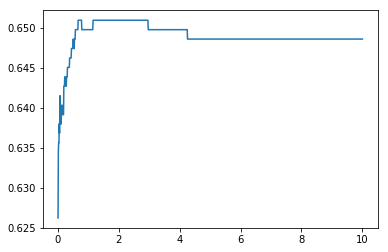

In [8]:
plt.plot(acc_dict.keys(), acc_dict.values())

## SVM

### Linear

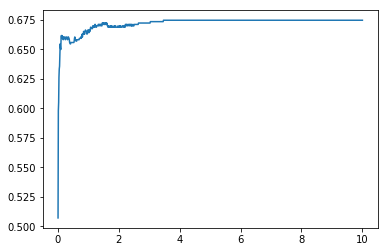

In [57]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.SVC(C=c, kernel='linear')
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

## RBF

In [10]:
acc_dict = {}
for g in np.linspace(0.25,0.45,100):
    acc_dict[g] = {}
    for c in np.linspace(5,7,50):
        s_v_m = svm.SVC(C=c, kernel='rbf', gamma=g)
        acc_dict[g][c] = np.mean(cross_validate(s_v_m, X_train, y_train, cv=3)['test_score'])


In [11]:
import operator
max_acc = []
for g in np.linspace(0.25,0.45,100):
    max_acc.append((max(acc_dict[g].items(), key=operator.itemgetter(1))[1]))


In [12]:
max(max_acc)
g = 0.4196969696969697
c = 5.204081632653061

In [13]:
print(max(max_acc))

0.6709049066561722


In [14]:
s_v_m = svm.SVC(C=5.2, kernel='rbf', gamma=.42)
print(np.mean(cross_validate(s_v_m, X_train, y_train)['test_score']))
s_v_m.fit(X_train, y_train)

0.6649946225732433


/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


SVC(C=5.2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.42, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
best_score = s_v_m.score(X_test, y_test)
print(best_score)

0.7420494699646644


In [16]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)

Confusion matrix, without normalization
[[ 11  20   1   0]
 [  0 121  19   4]
 [  0  22  47   3]
 [  0   1   3  31]]


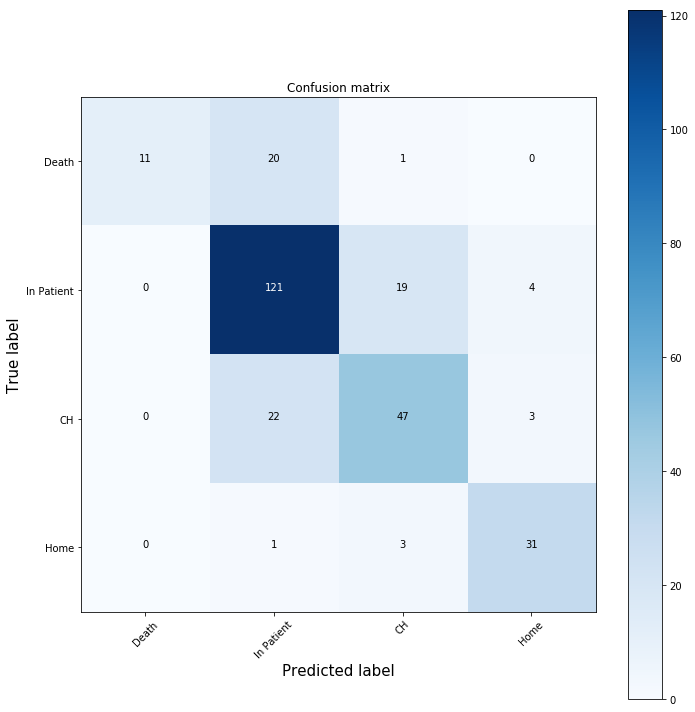

In [17]:
yhat = s_v_m.predict(X_test)
plt.figure(figsize=(10,10))
cmtx = confusion_matrix(y_test, yhat)
labels =  ['Death', 'In Patient', 'CH', 'Home']
plot_confusion_matrix(cmtx, labels)

In [159]:
precision_recall_fscore_support(y_test, yhat)

(array([0.625     , 0.74683544, 0.54411765, 0.73170732]),
 array([0.38461538, 0.77124183, 0.54411765, 0.83333333]),
 array([0.47619048, 0.75884244, 0.54411765, 0.77922078]),
 array([ 26, 153,  68,  36]))

## Polynomial

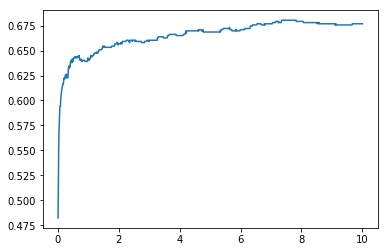

In [59]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.SVC(C=c, kernel='poly')
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

## LinearSVC



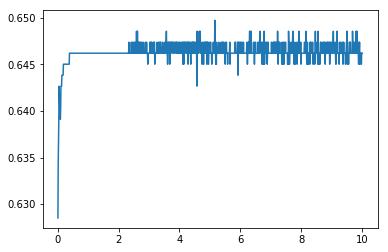

In [61]:
acc_dict = {}
for c in np.linspace(0.01,10,1000):
    s_v_m = svm.LinearSVC(C=c)
    acc_dict[c] = np.mean(cross_validate(s_v_m, X_train, y_train)['test_score'])

plt.plot(acc_dict.keys(), acc_dict.values())

# Random forest

In [18]:
acc_dict = {}
for n_features in range(1,4):
    for n_estimators in np.linspace(5,100,4):
        for n_min_leaf in np.linspace(5,100,4):
            rf = AdaBoostClassifier(RandomForestClassifier(), n_estimators=100)
            acc_dict[(n_features, n_estimators, n_min_leaf)] = np.mean(cross_validate(rf, X_train, y_train)['test_score'])

/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/archy/anaconda/envs/stroke-discharge/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 i

KeyboardInterrupt: 

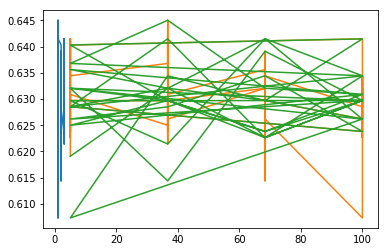

In [67]:
plt.plot(acc_dict.keys(), acc_dict.values())
plt.show()

In [68]:
acc_dict

{(1, 5.0, 5.0): 0.6190971439073086,
 (1, 5.0, 36.66666666666667): 0.632045209633361,
 (1, 5.0, 68.33333333333334): 0.6415014744087745,
 (1, 5.0, 100.0): 0.6344343365995874,
 (1, 36.66666666666667, 5.0): 0.6367942259980454,
 (1, 36.66666666666667, 36.66666666666667): 0.6450308665179727,
 (1, 36.66666666666667, 68.33333333333334): 0.6320535632241518,
 (1, 36.66666666666667, 100.0): 0.6308965908995982,
 (1, 68.33333333333334, 5.0): 0.6356247232873051,
 (1, 68.33333333333334, 36.66666666666667): 0.6320660936103385,
 (1, 68.33333333333334, 68.33333333333334): 0.6297312649842535,
 (1, 68.33333333333334, 100.0): 0.6261851656934733,
 (1, 100.0, 5.0): 0.607322757687392,
 (1, 100.0, 36.66666666666667): 0.6344343365995874,
 (1, 100.0, 68.33333333333334): 0.6297020274164851,
 (1, 100.0, 100.0): 0.6414805904317972,
 (2, 5.0, 5.0): 0.6403069109256614,
 (2, 5.0, 36.66666666666667): 0.6297229113934625,
 (2, 5.0, 68.33333333333334): 0.62382109949962,
 (2, 5.0, 100.0): 0.6308715301272252,
 (2, 36.666666

In [156]:
len(y_train)

848

In [157]:
len(y_test)

283

# Dummy model

In [19]:
dummy = DummyClassifier()

In [20]:
dummy.fit(X_train, y_train)
strat = dummy.score(X_test, y_test)
strat

0.3498233215547703

In [21]:
dummy = DummyClassifier('most_frequent')

In [22]:
dummy.fit(X_train, y_train)
max_class = dummy.score(X_test, y_test)
max_class

0.508833922261484

In [23]:
dummy = DummyClassifier('uniform')

In [24]:
dummy.fit(X_train, y_train)
uniform = dummy.score(X_test, y_test)
uniform

0.2862190812720848

Text(0.5, 0, 'Model')

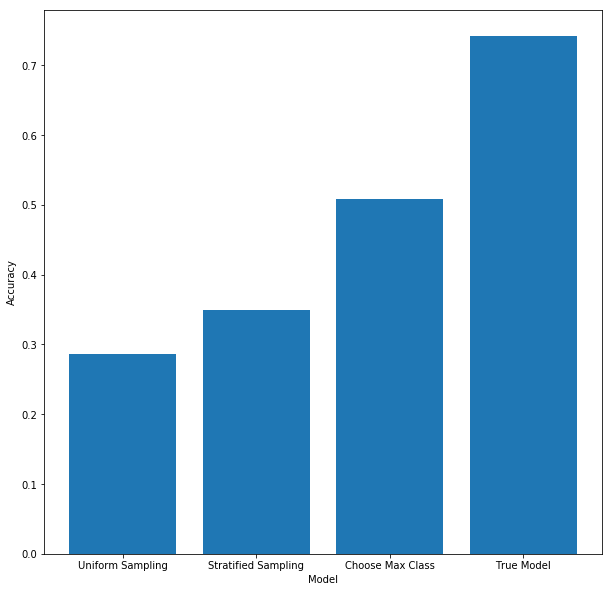

In [25]:
plt.figure(figsize=(10,10))

plt.bar(range(4), [uniform, strat, max_class, best_score])
plt.xticks(range(4), ['Uniform Sampling', 'Stratified Sampling',
           'Choose Max Class', 'True Model'])
plt.ylabel('Accuracy')
plt.xlabel('Model')

In [33]:
contingency_table = np.zeros((2,2))
dummy = DummyClassifier('most_frequent')
dummy.fit(X_train, y_train)

pred_real_model = s_v_m.predict(X_test)
correct_real_model = pred_real_model == y_test

pred_dummy_model = dummy.predict(X_test)
correct_dummy_model = pred_dummy_model == y_test


contingency_table[0,0] = sum(correct_real_model & correct_dummy_model)
contingency_table[0,1] = sum(correct_real_model & ~correct_dummy_model)
contingency_table[1,0] = sum(~correct_real_model & correct_dummy_model)
contingency_table[1,1] = sum(~correct_real_model & ~correct_dummy_model)
contingency_table


array([[121.,  89.],
       [ 23.,  50.]])

In [34]:

result = sm.stats.mcnemar(contingency_table)

In [35]:
result.pvalue

2.3795598280754494e-10

# Modelling scores as categorical variables